## Basic Ploting with Pandas

While we typically use a library like **matplotlib** or **seaborn** to plot graphs in Jupyter Notebook, Pandas DataFrames and Series also provide a handy **.plot()** method for quick and easy plotting..

In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [2]:
## let's download a data frame for instance
#italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

## Save the file with the correct filename
#urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

covid_df = pd.read_csv('italy-covid-daywise.csv')

In [3]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [4]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()

In [5]:
covid_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,NaN


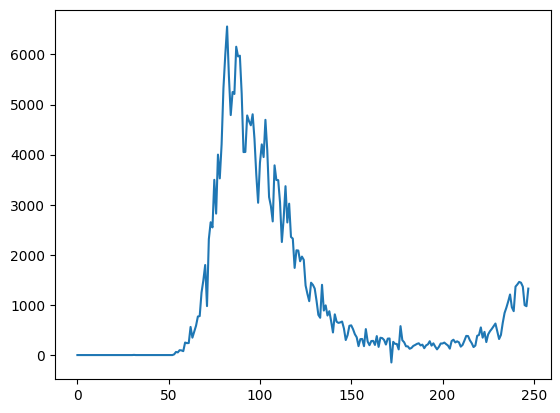

In [6]:
covid_df.new_cases.plot();

Although this plot shows the overall trend, it's hard to tell when and where the peak occurred, as there are no dates on the X-axis.
We can use the date column as the index of the DataFrame to address this issue

In [7]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

Since the dtype of the dates column is object, we need to convert it into a proper datetime format so that we can use it to plot graphs.

In [8]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [9]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [10]:
covid_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,NaN


In [11]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [12]:
covid_df['month_name'] = covid_df['date'].dt.month_name()

In [13]:
covid_month_df = covid_df.groupby('month_name')[['new_cases', 'new_tests', 'new_deaths']].sum()

In [14]:
# Defining the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [15]:
# Making sure 'month_name' column exists and is ordered correctly
covid_df['month_name'] = pd.Categorical(covid_df['month_name'], categories=month_order, ordered=True)

In [16]:
covid_month_df = covid_df.groupby('month_name')[['new_cases', 'new_tests', 'new_deaths']].sum().sort_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2756\15536674.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  covid_month_df = covid_df.groupby('month_name')[['new_cases', 'new_tests', 'new_deaths']].sum().sort_index()


In [17]:
covid_month_df

,new_cases,new_tests,new_deaths
month_name,,,
January,3.0,0.0,0.0
February,885.0,0.0,21.0
March,100851.0,0.0,11570.0
April,101852.0,419591.0,16091.0
May,29073.0,1078720.0,5658.0
June,7772.0,830354.0,1404.0
July,6722.0,797692.0,388.0
August,21060.0,1098704.0,345.0
September,3297.0,54395.0,20.0


In [18]:
covid_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,month_name
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,2019,12,31,1,December
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,1,2,January
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,2,3,January
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,3,4,January
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,4,5,January
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,2020,8,30,6,August
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,2020,8,31,0,August
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,2020,9,1,1,September
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,NaN,2020,9,2,2,September


In [19]:
covid_df['weekday_name'] = covid_df['date'].dt.day_name()

In [20]:
covid_df.set_index('date', inplace = True)

In [21]:
covid_df

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,month_name,weekday_name
date,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,2019,12,31,1,December,Tuesday
2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,1,2,January,Wednesday
2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,2,3,January,Thursday
2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,3,4,January,Friday
2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,4,5,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,2020,8,30,6,August,Sunday
2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,2020,8,31,0,August,Monday
2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,2020,9,1,1,September,Tuesday


<Axes: xlabel='date'>

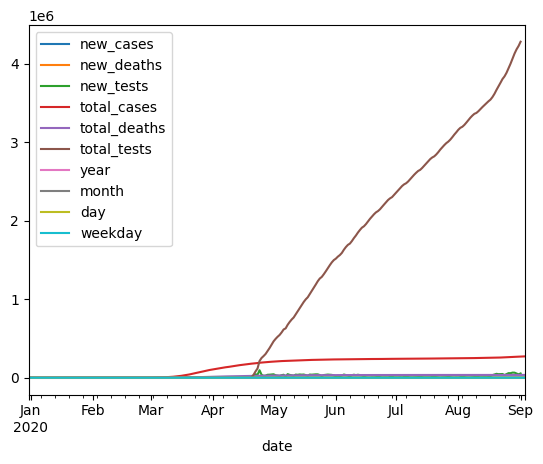

In [22]:
covid_df.plot()

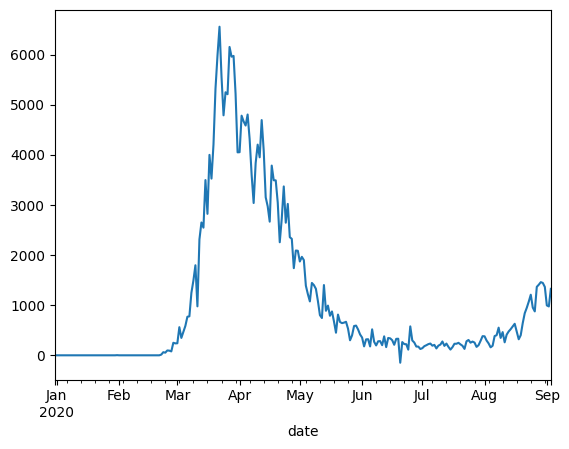

In [23]:
covid_df.new_cases.plot();

## Note:
**covid_df.set_index('date', inplace = True)**

The above line could be written in a single line like:

**covid_df.set_index('date').plot()**

But if you use:
**covid_df.set_index('date', inplace = True).plot()**
        **OR**
**covid_df.set_index('date', inplace = True).plot();**

this will cause an error causew when you use .set_index(..., inplace=True), the method modifies the DataFrame in place and returns None. So trying to chain .plot() immediately after that will raise an error like:

**AttributeError: 'NoneType' object has no attribute 'plot'**

You can't use .plot() directly after .set_index(..., inplace=True) because:

* .set_index(..., inplace=True) returns None (it just modifies the DataFrame itself).

* So you're effectively doing None.plot(), which causes an error.

The index pf the Data Frame doesn't have to be numeric. We could also turn the date into index which will also allow us to get the data for a specific data
whle using the **.loc** method

In [24]:
covid_df.loc['2020-09-01']

new_cases           996.0
new_deaths            6.0
new_tests         54395.0
total_cases      269214.0
total_deaths      35483.0
total_tests     4279456.0
year                 2020
month                   9
day                     1
weekday                 1
month_name      September
weekday_name      Tuesday
Name: 2020-09-01 00:00:00, dtype: object

In [25]:
covid_df.new_cases

date
2019-12-31       0.0
2020-01-01       0.0
2020-01-02       0.0
2020-01-03       0.0
2020-01-04       0.0
               ...  
2020-08-30    1444.0
2020-08-31    1365.0
2020-09-01     996.0
2020-09-02     975.0
2020-09-03    1326.0
Name: new_cases, Length: 248, dtype: float64

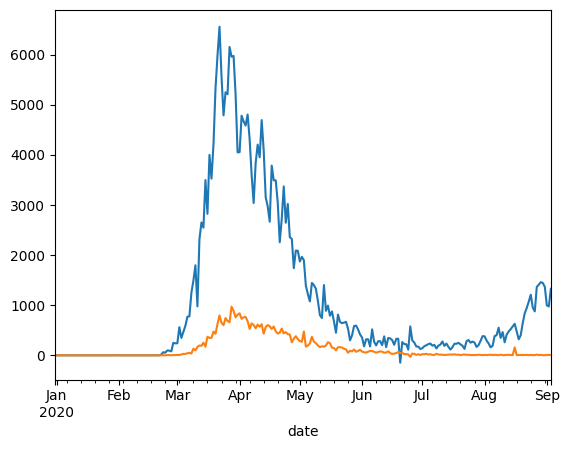

In [26]:
covid_df.new_cases.plot()
covid_df.new_deaths.plot();

## Why does this work without error?

**covid_df.new_cases.plot()
covid_df.new_deaths.plot();**

1. To suppress the output in Jupyter Notebooks
   the semicolon hides the text output like:
       **<matplotlib.axes._subplots.AxesSubplot at 0x000001...>**
   
2. To separate multiple statements on the same line

**Why no error even if you skip the semicolon?**

Because Python doesn't need it at the end of a line. Both of these are fine:

**covid_df.new_cases.plot() and covid_df.new_deaths.plot()**

Basically the semicolon is just cosmetic in this context — it doesn't affect the behavior of the plot itself.

### Summary

* The semicolon is not required, it just suppresses output in notebooks.

* That's why both lines work — the semicolon in the second is optional.

* You could remove it entirely, or add one to both — it won’t change the plots.

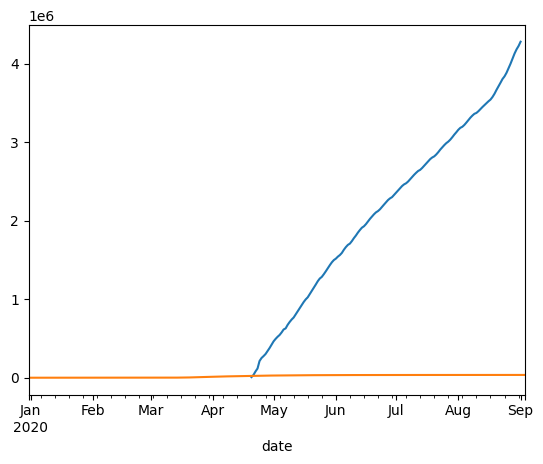

In [27]:
covid_df.total_tests.plot()
covid_df.total_deaths.plot();

In [28]:
death_rate = covid_df.total_deaths / covid_df.total_cases

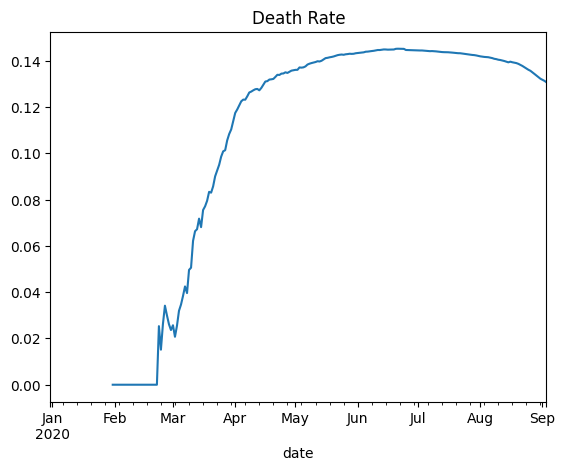

In [29]:
death_rate.plot(title = 'Death Rate');

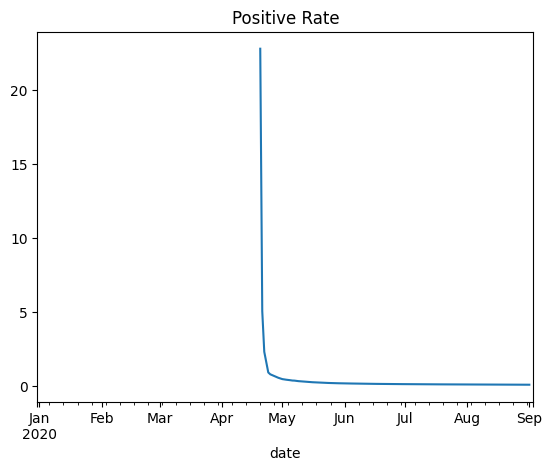

In [30]:
positive_rate = covid_df.total_cases / covid_df.total_tests
positive_rate.plot(title = 'Positive Rate');

In [31]:
covid_df

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,month_name,weekday_name
date,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,2019,12,31,1,December,Tuesday
2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,1,2,January,Wednesday
2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,2,3,January,Thursday
2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,3,4,January,Friday
2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,4,5,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,2020,8,30,6,August,Sunday
2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,2020,8,31,0,August,Monday
2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,2020,9,1,1,September,Tuesday


In [32]:
# Now group and sort
covid_month_df = covid_df.groupby('month_name')[['new_cases', 'new_tests', 'new_deaths']].sum().sort_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2756\1730805980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  covid_month_df = covid_df.groupby('month_name')[['new_cases', 'new_tests', 'new_deaths']].sum().sort_index()


In [33]:
covid_month_df

,new_cases,new_tests,new_deaths
month_name,,,
January,3.0,0.0,0.0
February,885.0,0.0,21.0
March,100851.0,0.0,11570.0
April,101852.0,419591.0,16091.0
May,29073.0,1078720.0,5658.0
June,7772.0,830354.0,1404.0
July,6722.0,797692.0,388.0
August,21060.0,1098704.0,345.0
September,3297.0,54395.0,20.0


<Axes: xlabel='month_name'>

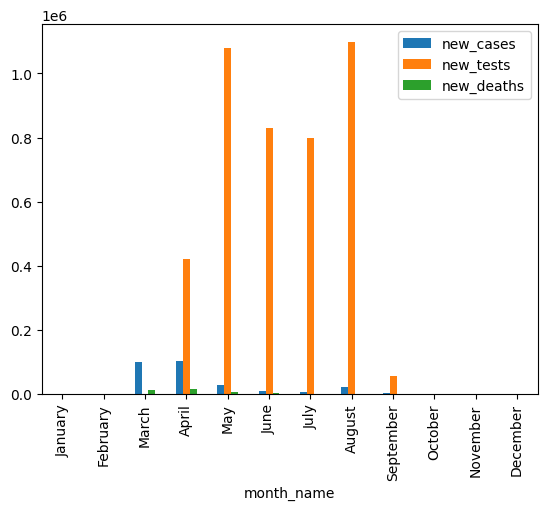

In [34]:
covid_month_df.plot(kind = 'bar')

<Axes: xlabel='month_name'>

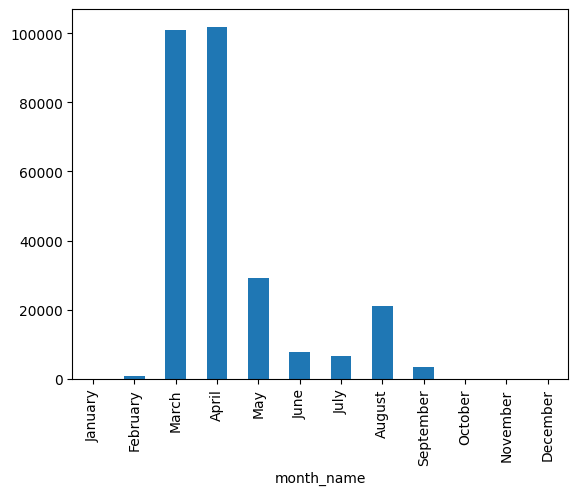

In [35]:
covid_month_df.new_cases.plot(kind = 'bar')

<Axes: ylabel='new_cases'>

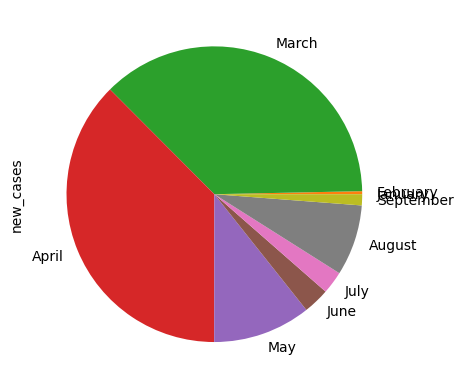

In [36]:
covid_month_df.new_cases.plot(kind = 'pie')

In [37]:
covid_df

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,month_name,weekday_name
date,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,2019,12,31,1,December,Tuesday
2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,1,2,January,Wednesday
2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,2,3,January,Thursday
2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,3,4,January,Friday
2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,4,5,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,2020,8,30,6,August,Sunday
2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,2020,8,31,0,August,Monday
2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,2020,9,1,1,September,Tuesday


## .isna() method

Think of .isna() method as asking:

***"Hey Pandas, which values are missing in this column or table?"***

And it answers with a 

**True when the data is missing (like a blank or a Nan value)** 

and 

**False when the data is present**

Syntax:

In [40]:
covid_df.new_tests.isna()

date
2019-12-31     True
2020-01-01     True
2020-01-02     True
2020-01-03     True
2020-01-04     True
              ...  
2020-08-30    False
2020-08-31    False
2020-09-01    False
2020-09-02     True
2020-09-03     True
Name: new_tests, Length: 248, dtype: bool

If you want to view the entire table to identify where the NaN values are located — particularly in the column named
**new_tests** — along with all other details, then use:

In [38]:
covid_df[covid_df['new_tests'].isna()]

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,year,month,day,weekday,month_name,weekday_name
date,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,2019,12,31,1,December,Tuesday
2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,1,2,January,Wednesday
2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,2,3,January,Thursday
2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,3,4,January,Friday
2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,2020,1,4,5,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-17,3786.0,525.0,NaN,168941.0,22172.0,NaN,2020,4,17,4,April,Friday
2020-04-18,3493.0,575.0,NaN,172434.0,22747.0,NaN,2020,4,18,5,April,Saturday
2020-04-19,3491.0,480.0,NaN,175925.0,23227.0,NaN,2020,4,19,6,April,Sunday


And if you wish to know how many NaNs are there then use:

In [39]:
covid_df.new_tests.isna().sum()

np.int64(113)